# Analyzing nearby stars

As data set I selected 5 random stars from APOKASC2 catalogue, which adopts spectroscopic parameters from APOGEE DR14, with parallaxes larger than 2.0 mas (distances < 500 pc) and fractional parallax error < 1.1 per cent. This report presents the results from each of the following methods and combinations of input parameters:

* __old__: results from PARAM _estima_from_seismology_ routine (with dynamic arrays) - 2 step method from Rodrigues et al. (2014). The input parameters are $T_{\rm eff}$, $[M/H]$, $\Delta_\nu$, and $\nu_{\rm max}$ with MESA tracks.
* __old_metdir__: results from the PARAM _direct_ method _estima_from_seismology_ routine (with dynamic vectors) from Rodrigues et al. (2014). The input parameters are $T_{\rm eff}$, $[M/H]$, $\Delta_\nu$, and $\nu_{\rm max}$ with MESA tracks.
* __new__: results from PARAM _estima_from_seismology_astrometry_ routine - 1 step method. The input parameters are: $T_{\rm eff}$, $[M/H]$, $\Delta_\nu$, and $\nu_{\rm max}$ with MESA tracks.
* __new_par__: results from PARAM _estima_from_seismology_astrometry_ routine - 1 step method. The input parameters are: $T_{\rm eff}$, $[M/H]$, $\Delta_\nu$, $\nu_{\rm max}$, and $\varpi$ with MESA tracks.


In [1]:
#Reading PARAM input and mode_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import sys
sys.path.append('/home/thaise/Libraries/Python/parampy/')

import parampy as pf

img_dir = "graphs/"

try:  
    os.mkdir(img_dir)
except OSError:  
    print ("Directory %s already exists." % img_dir)
else:  
    print ("Successfully created the directory %s. " % img_dir)

Directory graphs/ already exists.


In [2]:
old = pf.read_param_inp_outs("apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_apokascc_MESA_Dnu_numax/")
old_metdir = pf.read_param_inp_outs("apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.13_apokascc_metdir_Dnu_numax/")
new = pf.read_param_inp_outs("apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.07_gaiac_MESA_Dnu_numax/")
new_par = pf.read_param_inp_outs("apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_gaiac_MESA_Dnu_numax_par/")

Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_apokascc_MESA_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param.in
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_apokascc_MESA_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param_mo.out
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.13_apokascc_metdir_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param.in
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.13_apokascc_metdir_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param_mo.out
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.07_gaiac_MESA_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param.in
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.11.07_gaiac_MESA_Dnu_numax/apokasc_v4.4.2_gaia_bj_nearby_param_mo.out
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_gaiac_MESA_Dnu_numax_par/apokasc_v4.4.2_gaia_bj_nearby_param.in
Reading apokasc_v4.4.2_gaia_bj_nearby_param/2018.10.31_gaiac_MESA_Dnu_numax_par/apokasc_v4.4.2_gaia_bj_nearby_param_mo.out


In [3]:
pd.set_option("display.max_columns", None)
old.df.head()

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID   age_mo  age_68L_mo  age_68U_mo  \
0               0.022469  2M19381790+4857453   3.9575      3.3366      4.6218   
1               0.021132  2M19222335+4853586  10.0382      8.4140     12.0198   
2               0.022064  2M19552557+4805354  10.9510      9.3347     12.7307   
3               0.024049  2M19333399+4302096  11.6332      9.6716     13.6466

In [4]:
old_metdir.df

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID  age_mo  age_68L_mo  age_68U_mo  \
0               0.022469  2M19381790+4857453     NaN         NaN         NaN   
1               0.021132  2M19222335+4853586     NaN         NaN         NaN   
2               0.022064  2M19552557+4805354     NaN         NaN         NaN   
3               0.024049  2M19333399+4302096     NaN         NaN         NaN   
4

In [5]:
new.df

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID   age_mo  age_68L_mo  age_68U_mo  \
0               0.022469  2M19381790+4857453   3.7442      3.1989      4.4392   
1               0.021132  2M19222335+4853586   9.6060      8.0353     11.5389   
2               0.022064  2M19552557+4805354  10.6376      9.0157     12.3145   
3               0.024049  2M19333399+4302096  10.6422      8.8105     12.9777

In [6]:
new_par.df

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID  age_mo  age_68L_mo  age_68U_mo  \
0               0.022469  2M19381790+4857453  3.4861      3.1521      3.8447   
1               0.021132  2M19222335+4853586  8.8813      8.0482      9.6608   
2               0.022064  2M19552557+4805354  8.9977      8.3100      9.6609   
3               0.024049  2M19333399+4302096  8.7638      8.2224      9.3688   
4

## Comparison between the 1 step, 2 step, and direct mehotds (new, old, and old_metdir)

The figures below show probability density functions (PDFs) of logarithm of age, mass, radius, and surface gravity, distance modulus ($\mu_0$), distance, parallax (if it is an output parameter), and extinction ($A_V$) from 1 step (green line, __new__), 2 step (blue, __old__), and _direct_ (orange, __old_md__) methods for each star. Note: PDFs of mass, radius, and log g from the _direct_ method are Normal distributions with standard deviations equal the parameter uncertanties propagated from the scaling relations. The 2 step and _direct_ method (__old__ and __old_metdir__) do not compute the parallax PDF.

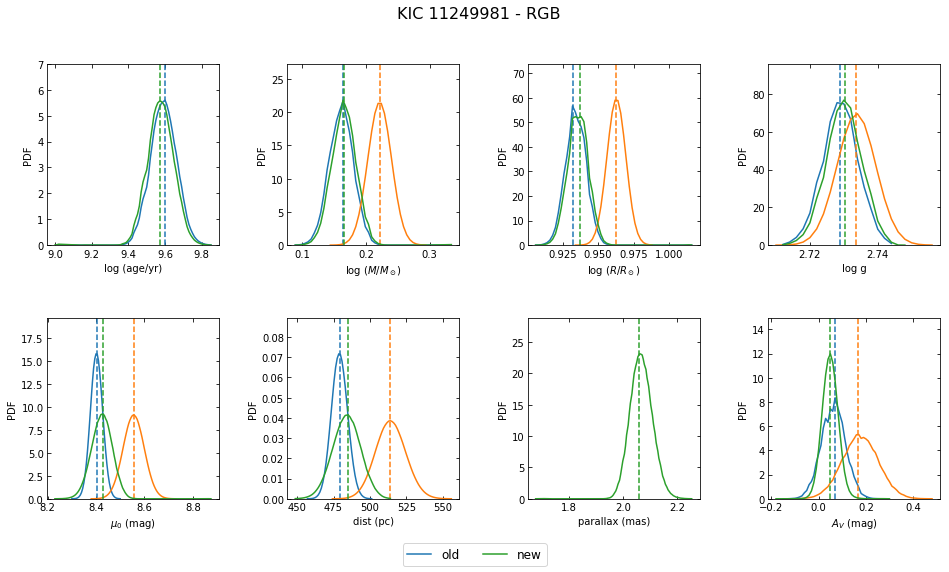

In [7]:
pf.plot_npdfs(11249981, old, 'old', old_metdir, 'old_md', new, 'new', title= "KIC 11249981 - RGB")

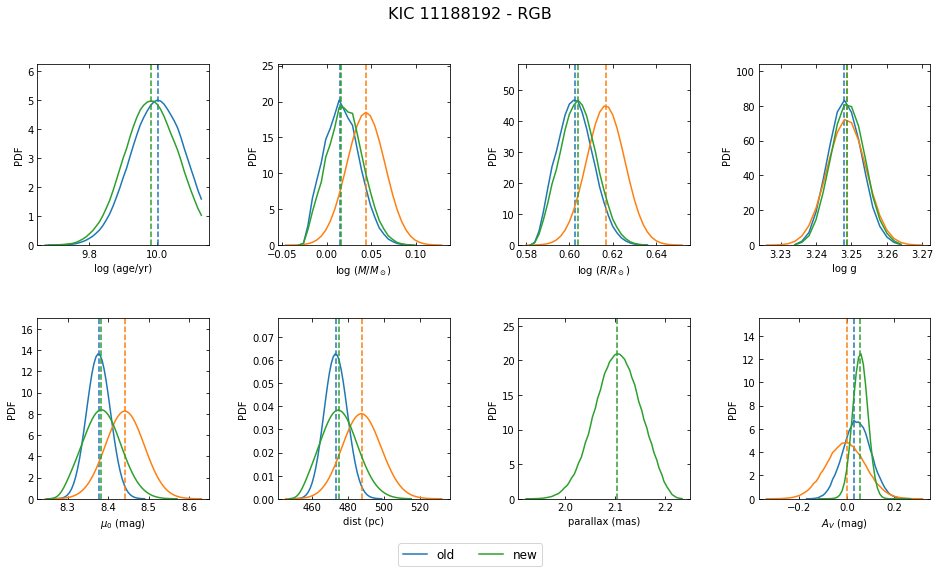

In [8]:
pf.plot_npdfs(11188192, old, 'old', old_metdir, 'old_md', new, 'new', title= "KIC 11188192 - RGB")

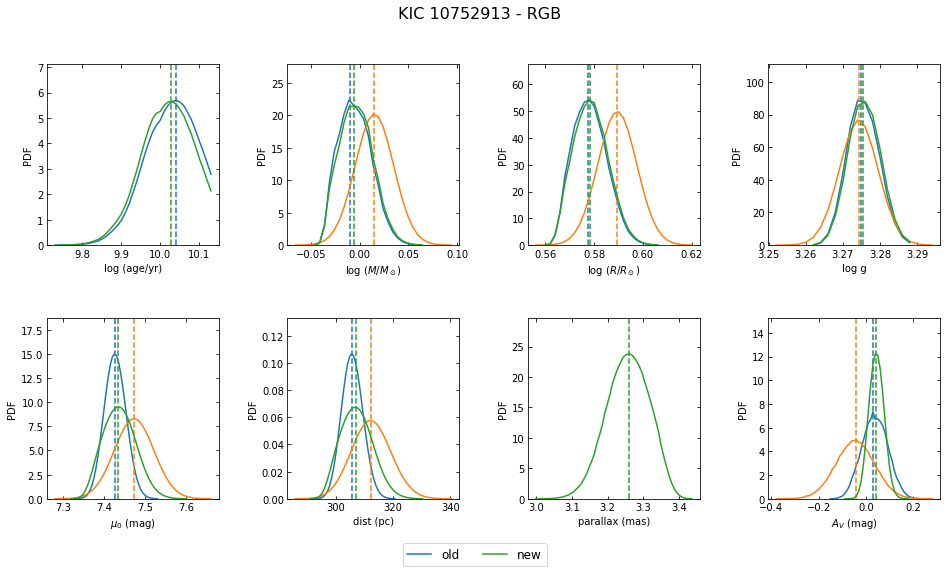

In [9]:
pf.plot_npdfs(10752913, old, 'old', old_metdir, 'old_md', new, 'new', title= "KIC 10752913 - RGB")

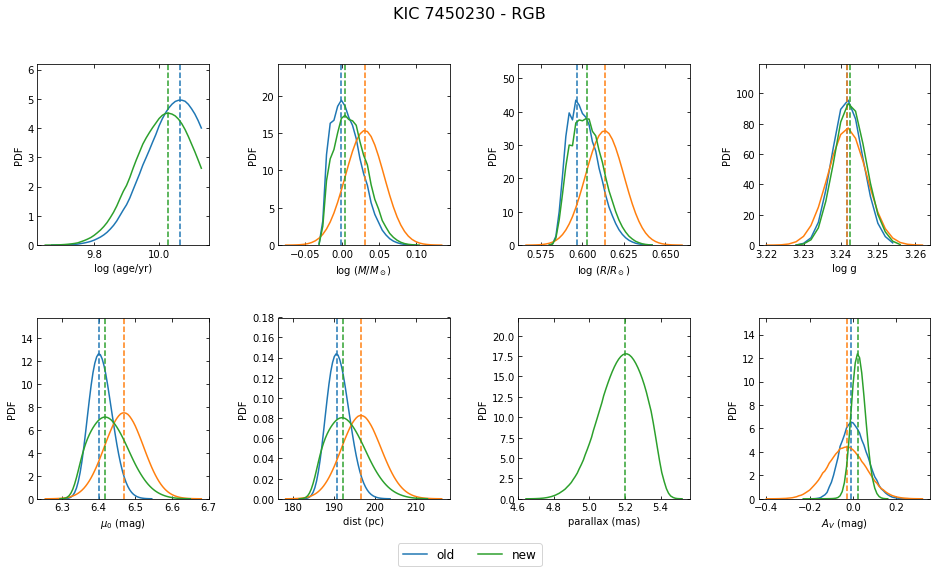

In [10]:
pf.plot_npdfs(7450230, old, 'old', old_metdir, 'old_md', new, 'new', title= "KIC 7450230 - RGB")

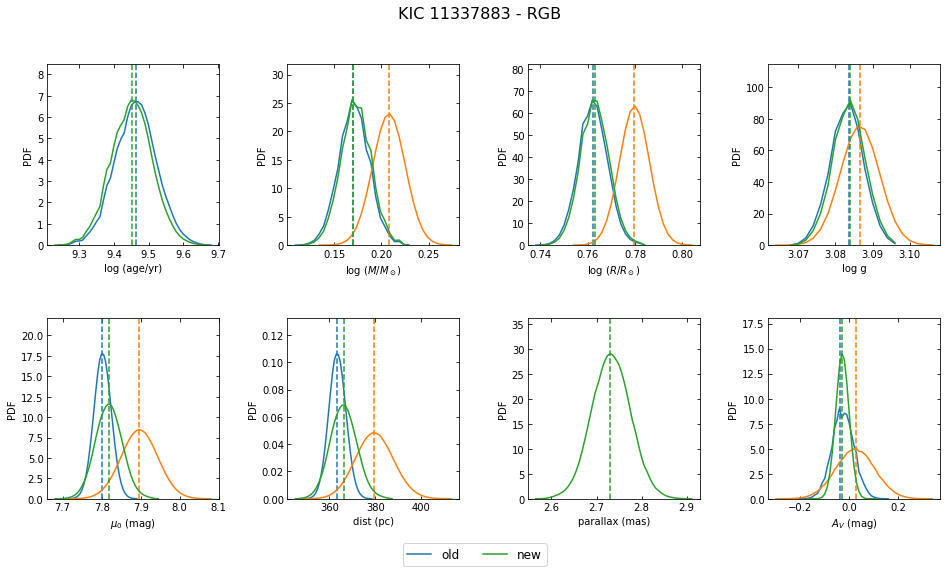

In [11]:
pf.plot_npdfs(11337883, old, 'old', old_metdir, 'old_md', new, 'new', title= "KIC 11337883 - RGB")

### Parameter uncertainties

In [12]:
old = pf.uncertainties(old)
old_metdir = pf.uncertainties(old_metdir)
new = pf.uncertainties(new)

Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI
Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI
Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI


In [13]:
old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo']

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
0        0.162375         0.043463        0.016622          0.00525   
1        0.179604         0.046123        0.019305          0.00475   
2        0.155054         0.039894        0.016283          0.00430   
3        0.170847         0.045855        0.020759          0.00415   
4        0.138138         0.037022        0.014015          0.00440   

   abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_Av_mo  
0         0.02490         0.011466        0.05025  
1         0.02895         0.013331        0.05890  
2         0.02630         0.012109        0.05530  
3         0.03125         0.014406        0.06045  
4         0.02230         0.010253        0.04465

In [14]:
old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].describe()

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
count        5.000000         5.000000        5.000000          5.00000   
mean         0.161204         0.042471        0.017397          0.00457   
std          0.015833         0.003940        0.002656          0.00044   
min          0.138138         0.037022        0.014015          0.00415   
25%          0.155054         0.039894        0.016283          0.00430   
50%          0.162375         0.043463        0.016622          0.00440   
75%          0.170847         0.045855        0.019305          0.00475   
max          0.179604         0.046123        0.020759          0.00525   

       abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_Av_mo  
count        5.000000         5.000000       5.000000  
mean         0.026740         0.012313       0.053910  
std          0.003483         0.001614       0.006495  
min          0.022300         0.010253       0.044650  
25%          0.024900         0.011466       0.050250  
50%          0.026300         0.012109       0.055300  
75%          0.028950         0.013331       0.058900  
max          0.031250         0.014406       0.060450

In [15]:
old_metdir.df.loc[:,'rel_unc_mass_mo':'abs_unc_Av_mo'].describe()

rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  abs_unc_mu0_mo  \
count         5.000000        5.000000         5.000000        5.000000   
mean          0.047464        0.019106         0.005360        0.047840   
std           0.007816        0.004892         0.000233        0.003415   
min           0.039700        0.014511         0.005150        0.043400   
25%           0.042665        0.015427         0.005200        0.046950   
50%           0.045490        0.018400         0.005250        0.047850   
75%           0.049657        0.020411         0.005500        0.048050   
max           0.059808        0.026779         0.005700        0.052950   

       rel_unc_dist_mo  abs_unc_Av_mo  
count         5.000000       5.000000  
mean          0.022048       0.081680  
std           0.001579       0.005134  
min           0.019997       0.075850  
25%           0.021633       0.079700  
50%           0.022091       0.080900  
75%           0.022110       0.082100  
max           0.024411       0.089850

In [16]:
new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].describe()

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
count        5.000000         5.000000        5.000000          5.00000   
mean         0.166923         0.043956        0.017769          0.00459   
std          0.023366         0.005898        0.003450          0.00042   
min          0.135781         0.036672        0.013801          0.00420   
25%          0.155054         0.040073        0.016255          0.00435   
50%          0.165630         0.043956        0.016485          0.00435   
75%          0.182365         0.047459        0.019562          0.00485   
max          0.195787         0.051622        0.022740          0.00520   

       abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_par_mo  abs_unc_Av_mo  
count        5.000000         5.000000        5.000000        5.00000  
mean         0.043710         0.020129        0.062190        0.03118  
std          0.007343         0.003390        0.036278        0.00217  
min          0.034150         0.015723        0.040150        0.02745  
25%          0.040600         0.018698        0.041650        0.03170  
50%          0.042900         0.019728        0.043850        0.03175  
75%          0.047050         0.021680        0.059750        0.03185  
max          0.053850         0.024814        0.125550        0.03315

The mean relative and absolute parameter uncertainties from the 1 step, 2 step, and _direct_ methods (__new__, __old__, and __old_metdir__) are shown in the table below.

In [17]:
# Median
pd.concat([new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].median(),
           old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].median(),
           old_metdir.df.loc[:,'rel_unc_mass_mo':'abs_unc_Av_mo'].median()],
          axis=1, sort=False,
          keys=['new', 'old', 'old_metdir'])

new       old  old_metdir
rel_unc_age_mo   0.165630  0.162375         NaN
rel_unc_mass_mo  0.043956  0.043463    0.045490
rel_unc_rad_mo   0.016485  0.016622    0.018400
abs_unc_logg_mo  0.004350  0.004400    0.005250
abs_unc_mu0_mo   0.042900  0.026300    0.047850
rel_unc_dist_mo  0.019728  0.012109    0.022091
abs_unc_par_mo   0.043850       NaN         NaN
abs_unc_Av_mo    0.031750  0.055300    0.080900

In [18]:
# Mean
pd.concat([new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
           old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
           old_metdir.df.loc[:,'rel_unc_mass_mo':'abs_unc_Av_mo'].mean()],
          axis=1, sort=False,
          keys=['new', 'old', 'old_metdir'])

new       old  old_metdir
rel_unc_age_mo   0.166923  0.161204         NaN
rel_unc_mass_mo  0.043956  0.042471    0.047464
rel_unc_rad_mo   0.017769  0.017397    0.019106
abs_unc_logg_mo  0.004590  0.004570    0.005360
abs_unc_mu0_mo   0.043710  0.026740    0.047840
rel_unc_dist_mo  0.020129  0.012313    0.022048
abs_unc_par_mo   0.062190       NaN         NaN
abs_unc_Av_mo    0.031180  0.053910    0.081680

### Conclusions

* The __old__ and __new__ PDFs have almost the same shape and mode values. This proves that the Bayesian method (divided in 2 steps) described in Rodrigues et al. (2014) is a very good approximation of the _one step_ Bayesian method.
* It is expected to see differences between the _direct_ and Bayesian methods as discussed extensively in many papers!
* The 1 step method results mean uncertainties on age, mass, and radius similar to the 2 step method ($\approx$ 17.0, 4.4, and 1.8 per cent, respectively).
* It _seems_ that the 2 step method (__old__) provides narrower $\mu_0$ and distance PDFs than the 1 step method (__new__) when using the same input parameters (i.e., no parallax). Distances are estimated with mean uncertainties around 1.2 and 2.0 per cent, respectively.
* The mean distance uncertainty from 1 step method is compatible with the radius uncertainty (1.7 per cent), what is expected, and it is also similar with the one from the _direct_ method (1.9 per cent).
* In the other hand, the $A_V$ PDFs from 1 step method (__new__) are narrower. The mean uncertainties decrease from 0.05 to 0.03 mag.

## Comparison between 1 step method with and without parallax and 2 step method (new_par, new, and old)

The figures below show probability density functions (PDFs) of logarithm of age, mass, radius, and surface gravity, distance modulus ($\mu_0$), distance, parallax (if it is an output parameter), and extinction ($A_V$) from 1 step method with parallax as an input parameter (green line, __new_par__), 1 step method without parallax (orange, __new__), and 2 step method (blue, __old__) for each star. Note: the 2 step method (__old__) does not compute the parallax PDF.

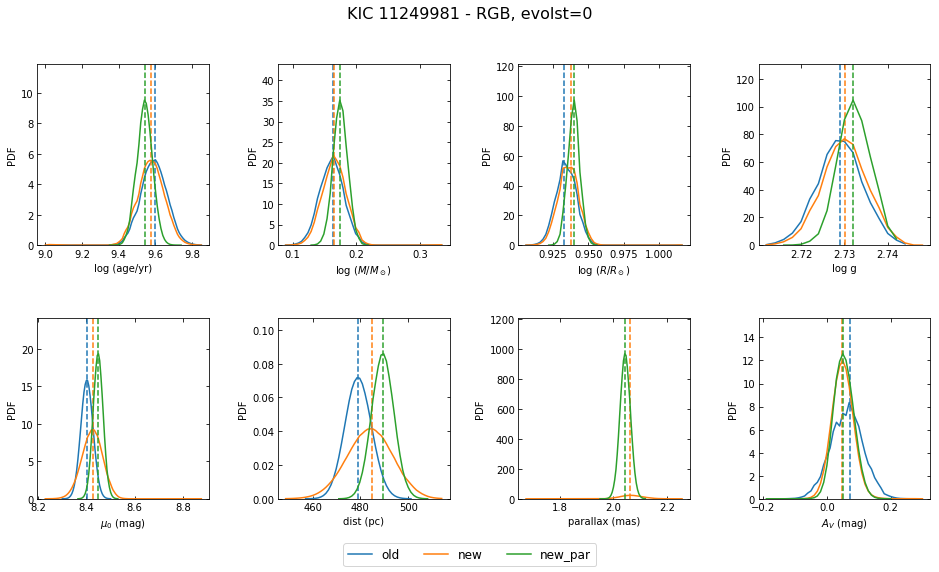

In [19]:
pf.plot_npdfs(11249981, old, 'old', new, 'new', new_par, 'new_par', title= "KIC 11249981 - RGB, evolst=0")

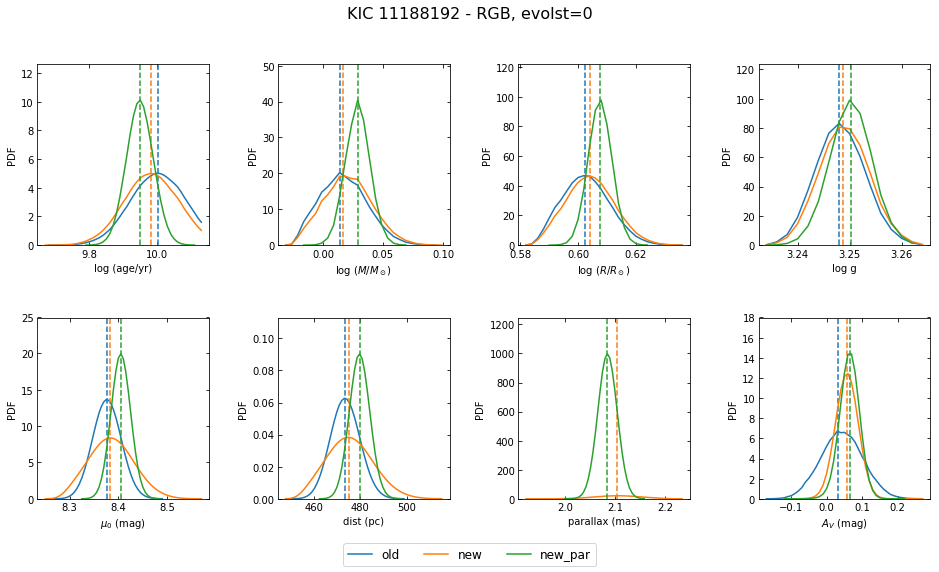

In [20]:
pf.plot_npdfs(11188192, old, 'old', new, 'new', new_par, 'new_par', title= "KIC 11188192 - RGB, evolst=0")

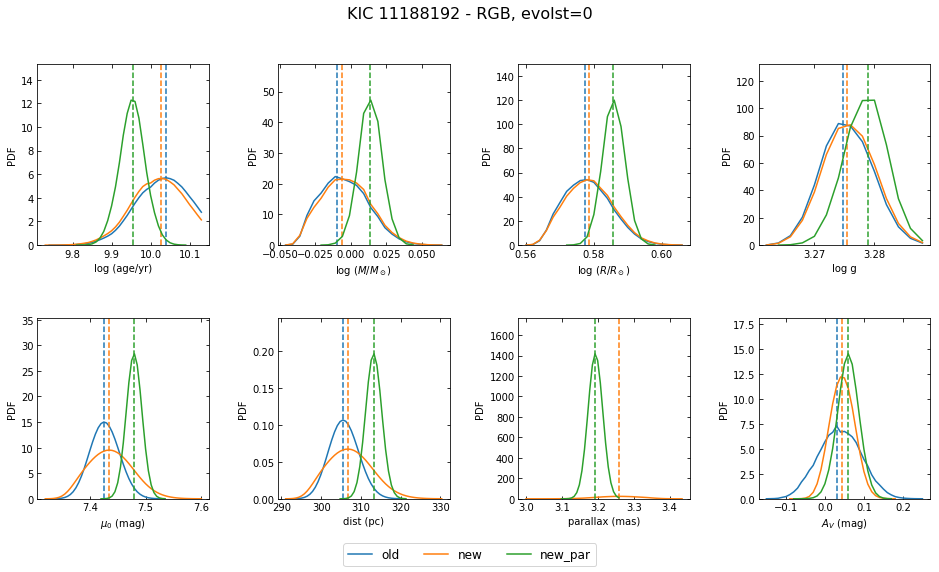

In [21]:
pf.plot_npdfs(10752913, old, 'old', new, 'new', new_par, 'new_par', title= "KIC 11188192 - RGB, evolst=0")

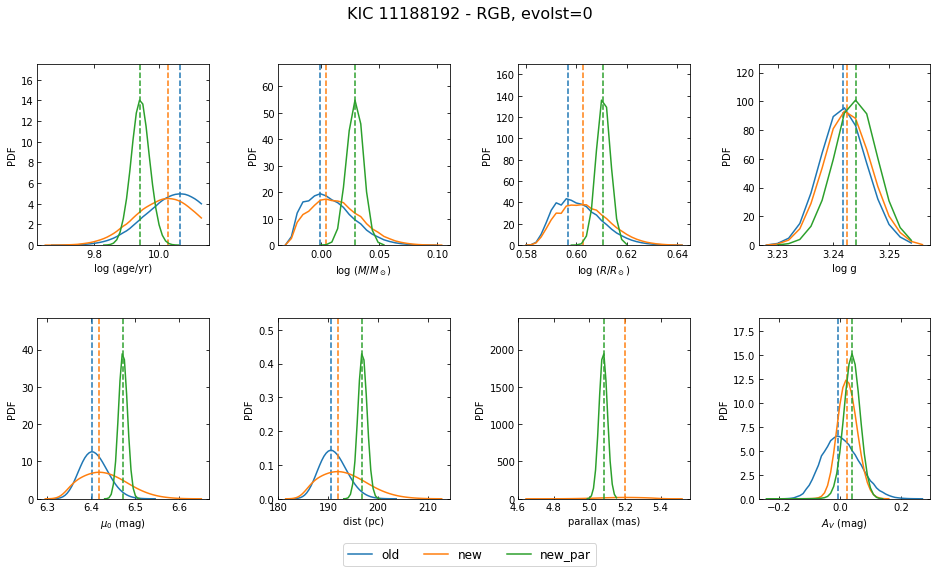

In [22]:
pf.plot_npdfs(7450230, old, 'old', new, 'new', new_par, 'new_par', title= "KIC 11188192 - RGB, evolst=0")

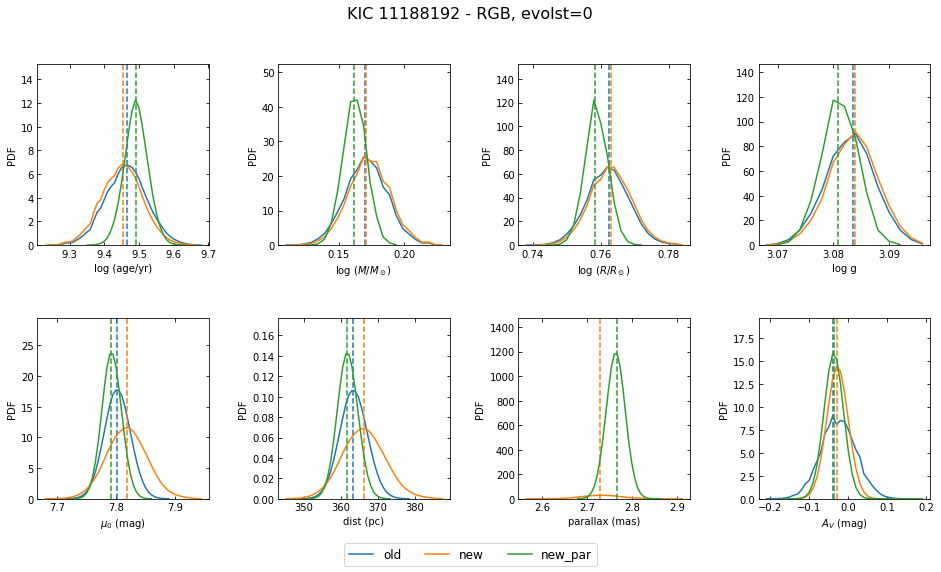

In [23]:
pf.plot_npdfs(11337883, old, 'old', new, 'new', new_par, 'new_par', title= "KIC 11188192 - RGB, evolst=0")

### Parameter uncertainties

In [24]:
new_par = pf.uncertainties(new_par)

Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI


In [25]:
new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo']

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
0        0.099337         0.026356        0.009744          0.00385   
1        0.090786         0.023562        0.009318          0.00405   
2        0.075069         0.018569        0.007488          0.00355   
3        0.065405         0.016173        0.006518          0.00390   
4        0.077288         0.020912        0.007859          0.00335   

   abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_par_mo  abs_unc_Av_mo  
0         0.02050         0.009449         0.01880        0.03125  
1         0.01990         0.009182         0.01685        0.02745  
2         0.01400         0.006466         0.01840        0.02775  
3         0.00995         0.004600         0.02335        0.02655  
4         0.01675         0.007700         0.01910        0.02490

In [26]:
old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo']

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
0        0.162375         0.043463        0.016622          0.00525   
1        0.179604         0.046123        0.019305          0.00475   
2        0.155054         0.039894        0.016283          0.00430   
3        0.170847         0.045855        0.020759          0.00415   
4        0.138138         0.037022        0.014015          0.00440   

   abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_Av_mo  
0         0.02490         0.011466        0.05025  
1         0.02895         0.013331        0.05890  
2         0.02630         0.012109        0.05530  
3         0.03125         0.014406        0.06045  
4         0.02230         0.010253        0.04465

In [27]:
new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].describe()

rel_unc_age_mo  rel_unc_mass_mo  rel_unc_rad_mo  abs_unc_logg_mo  \
count        5.000000         5.000000        5.000000         5.000000   
mean         0.081577         0.021115        0.008185         0.003740   
std          0.013440         0.004013        0.001331         0.000284   
min          0.065405         0.016173        0.006518         0.003350   
25%          0.075069         0.018569        0.007488         0.003550   
50%          0.077288         0.020912        0.007859         0.003850   
75%          0.090786         0.023562        0.009318         0.003900   
max          0.099337         0.026356        0.009744         0.004050   

       abs_unc_mu0_mo  rel_unc_dist_mo  abs_unc_par_mo  abs_unc_Av_mo  
count         5.00000         5.000000        5.000000       5.000000  
mean          0.01622         0.007479        0.019300       0.027580  
std           0.00437         0.002009        0.002424       0.002332  
min           0.00995         0.004600        0.016850       0.024900  
25%           0.01400         0.006466        0.018400       0.026550  
50%           0.01675         0.007700        0.018800       0.027450  
75%           0.01990         0.009182        0.019100       0.027750  
max           0.02050         0.009449        0.023350       0.031250

The mean relative and absolute parameter uncertainties from the 1 step method with and without parallax, 2 step method, and _direct_ method (__new_par__, __new__, __old__, and __old_metdir__) are shown in the table below.

In [28]:
# Median
pd.concat([new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].median(),
           new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].median(),
           old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].median(),
           old_metdir.df.loc[:,'rel_unc_mass_mo':'abs_unc_Av_mo'].median()],
          axis=1, sort=False,
          keys=['new_par', 'new', 'old', 'old_metdir'])

new_par       new       old  old_metdir
rel_unc_age_mo   0.077288  0.165630  0.162375         NaN
rel_unc_mass_mo  0.020912  0.043956  0.043463    0.045490
rel_unc_rad_mo   0.007859  0.016485  0.016622    0.018400
abs_unc_logg_mo  0.003850  0.004350  0.004400    0.005250
abs_unc_mu0_mo   0.016750  0.042900  0.026300    0.047850
rel_unc_dist_mo  0.007700  0.019728  0.012109    0.022091
abs_unc_par_mo   0.018800  0.043850       NaN         NaN
abs_unc_Av_mo    0.027450  0.031750  0.055300    0.080900

In [29]:
# Mean
pd.concat([new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
           new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
           old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
           old_metdir.df.loc[:,'rel_unc_mass_mo':'abs_unc_Av_mo'].mean()],
          axis=1, sort=False,
          keys=['new_par', 'new', 'old', 'old_metdir'])

new_par       new       old  old_metdir
rel_unc_age_mo   0.081577  0.166923  0.161204         NaN
rel_unc_mass_mo  0.021115  0.043956  0.042471    0.047464
rel_unc_rad_mo   0.008185  0.017769  0.017397    0.019106
abs_unc_logg_mo  0.003740  0.004590  0.004570    0.005360
abs_unc_mu0_mo   0.016220  0.043710  0.026740    0.047840
rel_unc_dist_mo  0.007479  0.020129  0.012313    0.022048
abs_unc_par_mo   0.019300  0.062190       NaN         NaN
abs_unc_Av_mo    0.027580  0.031180  0.053910    0.081680

In [30]:
new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean()/old.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean()

abs_unc_Av_mo      0.511593
abs_unc_logg_mo    0.818381
abs_unc_mu0_mo     0.606582
abs_unc_par_mo          NaN
rel_unc_age_mo     0.506051
rel_unc_dist_mo    0.607430
rel_unc_mass_mo    0.497146
rel_unc_rad_mo     0.470508
dtype: float64

In [31]:
new_par.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean()/new.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean()

rel_unc_age_mo     0.488711
rel_unc_mass_mo    0.480354
rel_unc_rad_mo     0.460664
abs_unc_logg_mo    0.814815
abs_unc_mu0_mo     0.371082
rel_unc_dist_mo    0.371573
abs_unc_par_mo     0.310339
abs_unc_Av_mo      0.884541
dtype: float64

In [32]:
(new_par.df.age_68U_mo-new_par.df.age_mo)/new_par.df.age_mo

0    0.102866
1    0.087769
2    0.073708
3    0.069034
4    0.081162
dtype: float64

### Conclusions

* Shape and mode values of the PDFs from the 1 step method with parallax (__new_par__) are different when compared with 1 step without parallax and 2 step methods (__new__ and __old__). Is it due to the inclusion of the parallax as input parameter or because there is an offset in the Gaia DR2 catalogue? The shape may be because the inclusion of the parallax, while the mode differences may be due to the parallax offset.
* Including parallax __seems__ to narrow all the PDFs by almost a factor of 0.50 in age and mass, of 0.47 in radius, of 0.51 in $A_V$, and by a factor of 0.61 in distance comparing with 2 step method values (__old__). In the case of __new__, the __new_par__ PDFs are narrower by a factor of 0.48 in age and mass, of 0.46 in radius and by a factor of 0.37 in distance.
* The mean relative uncertainties on age, mass, radius, and distance decrease from 16.1, 4.2, 1.7, and 1.2 per cent to 8.1, 2.1, 0.8, and 0.7 per cent when adding parallax, respectively, (comparing __old__ and __new_par__). The mean absolute uncertainties on extinction decrease from 0.05 to 0.03 mag.

## Apparent and absolute magnitude PDFs

The figures below show PDFs of apparent ($m_\lambda$) and absolute ($M_\lambda$) magnitudes for each method and each star. Note: PDFs of apparent magnitudes ($m_\lambda$) from 2 step method (__old__ and __old_metdir__) are simply Normal distributions with standard deviations (1$\sigma$) equal the magnitude uncertanties, while from 1 step method (__new__ and __new_par__) they are the result from the marginalized posterior distribution, i.e., the marginalized distribution taking into account the combination of all the parameters and apparent magnitudes, and priors.

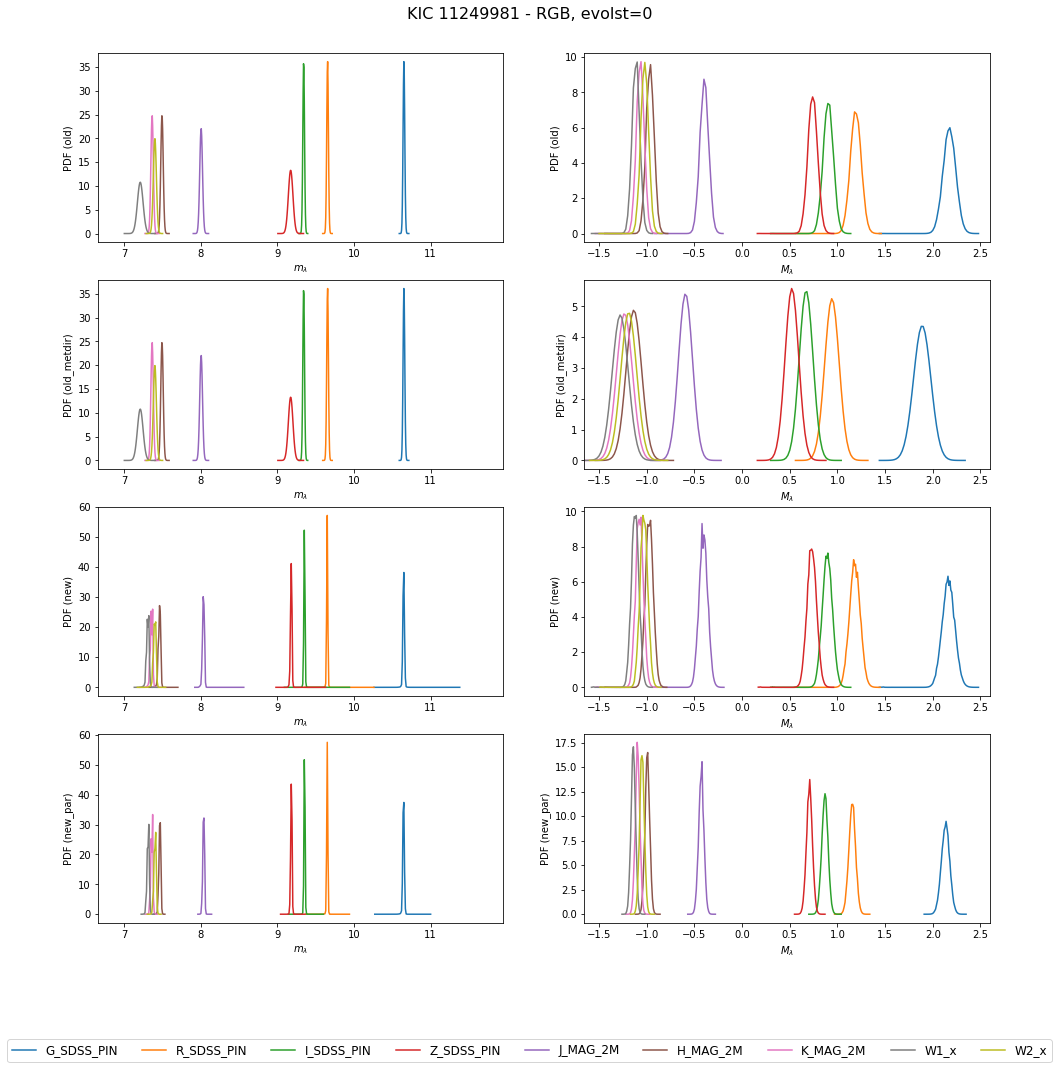

In [33]:
pf.plot_npdfs_mag(11249981, old, 'old', old_metdir, 'old_metdir', new, 'new', new_par, 'new_par',
                 title= "KIC 11249981 - RGB, evolst=0", last_mag_col='W4_x')

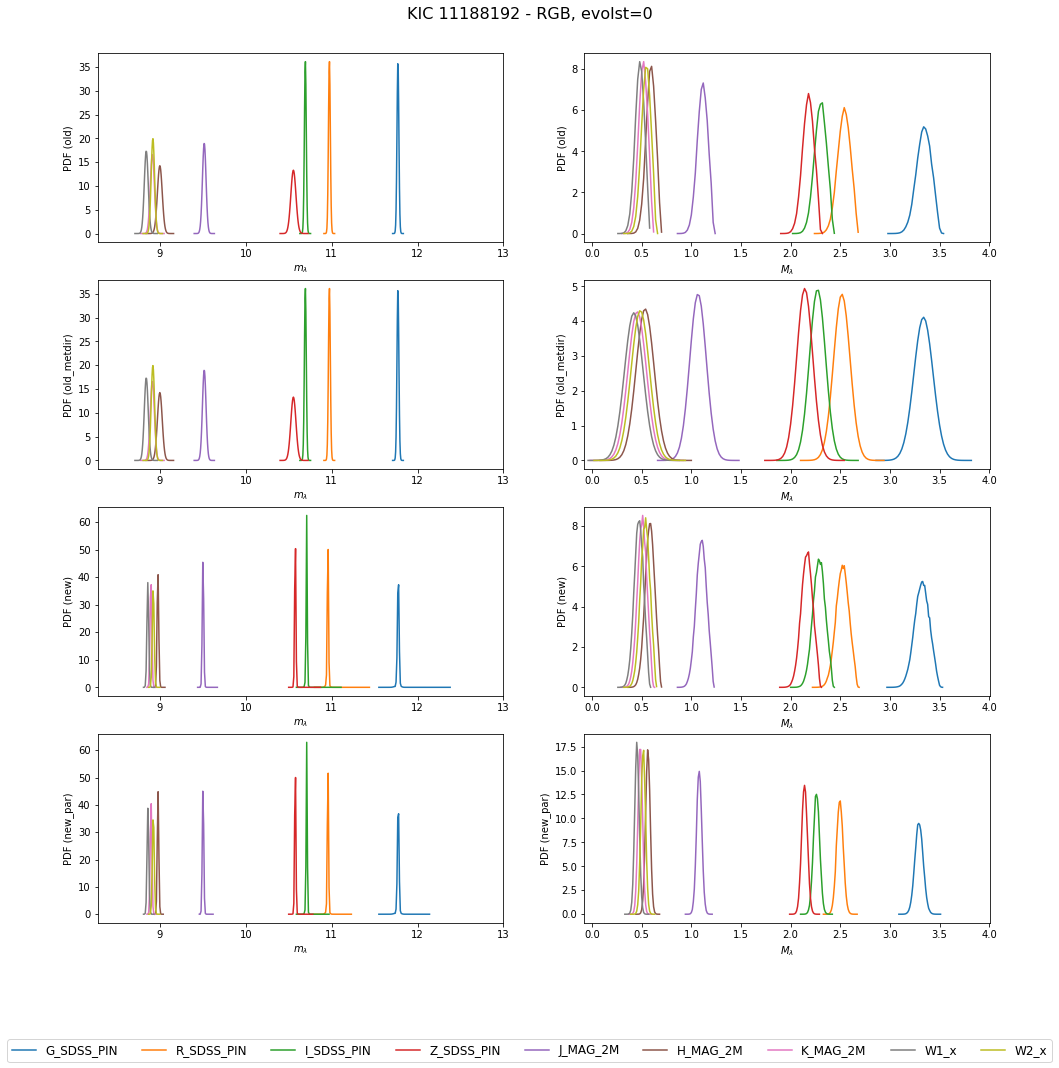

In [34]:
pf.plot_npdfs_mag(11188192, old, 'old', old_metdir, 'old_metdir', new, 'new', new_par, 'new_par',
                 title= "KIC 11188192 - RGB, evolst=0", last_mag_col='W4_x')

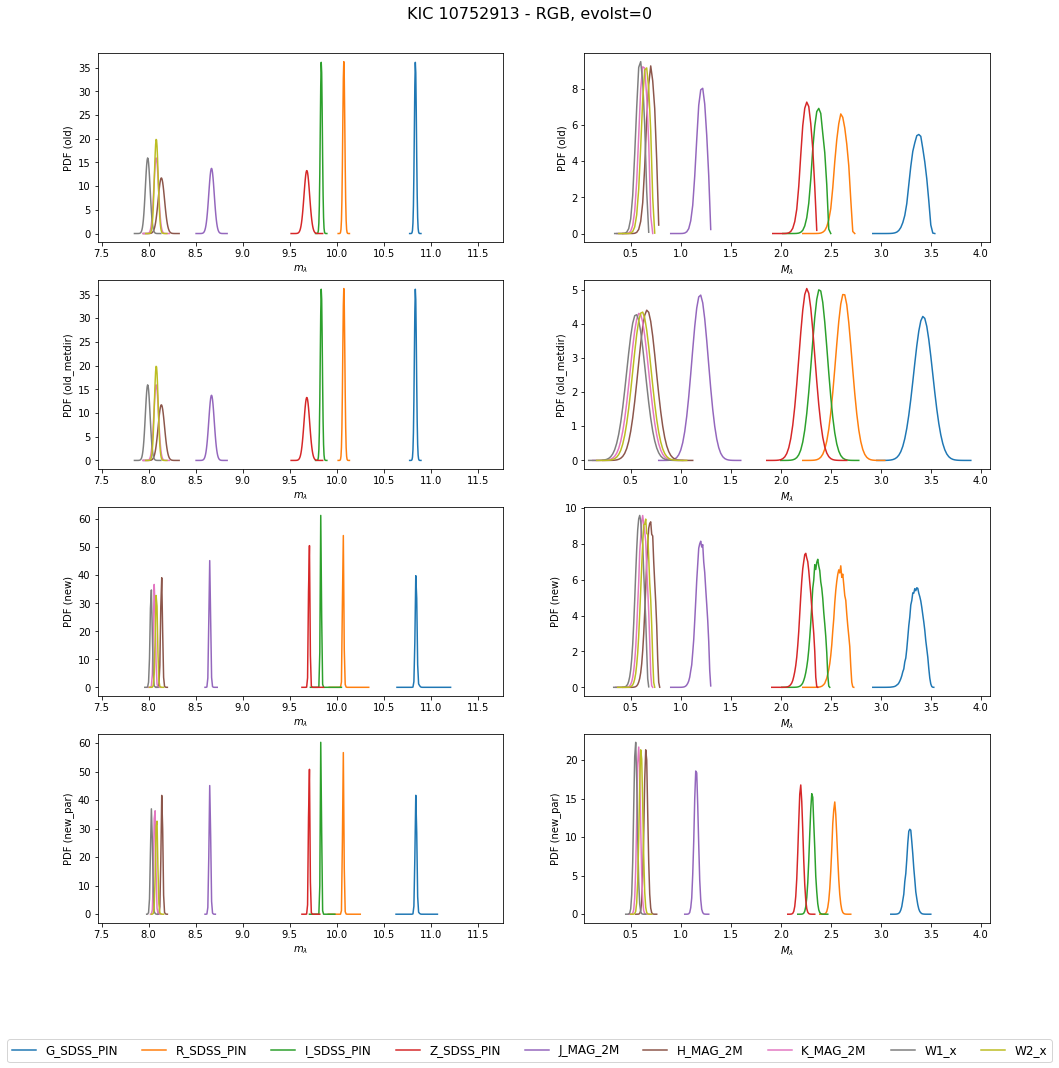

In [35]:
pf.plot_npdfs_mag(10752913, old, 'old', old_metdir, 'old_metdir', new, 'new', new_par, 'new_par',
                 title= "KIC 10752913 - RGB, evolst=0", last_mag_col='W4_x')

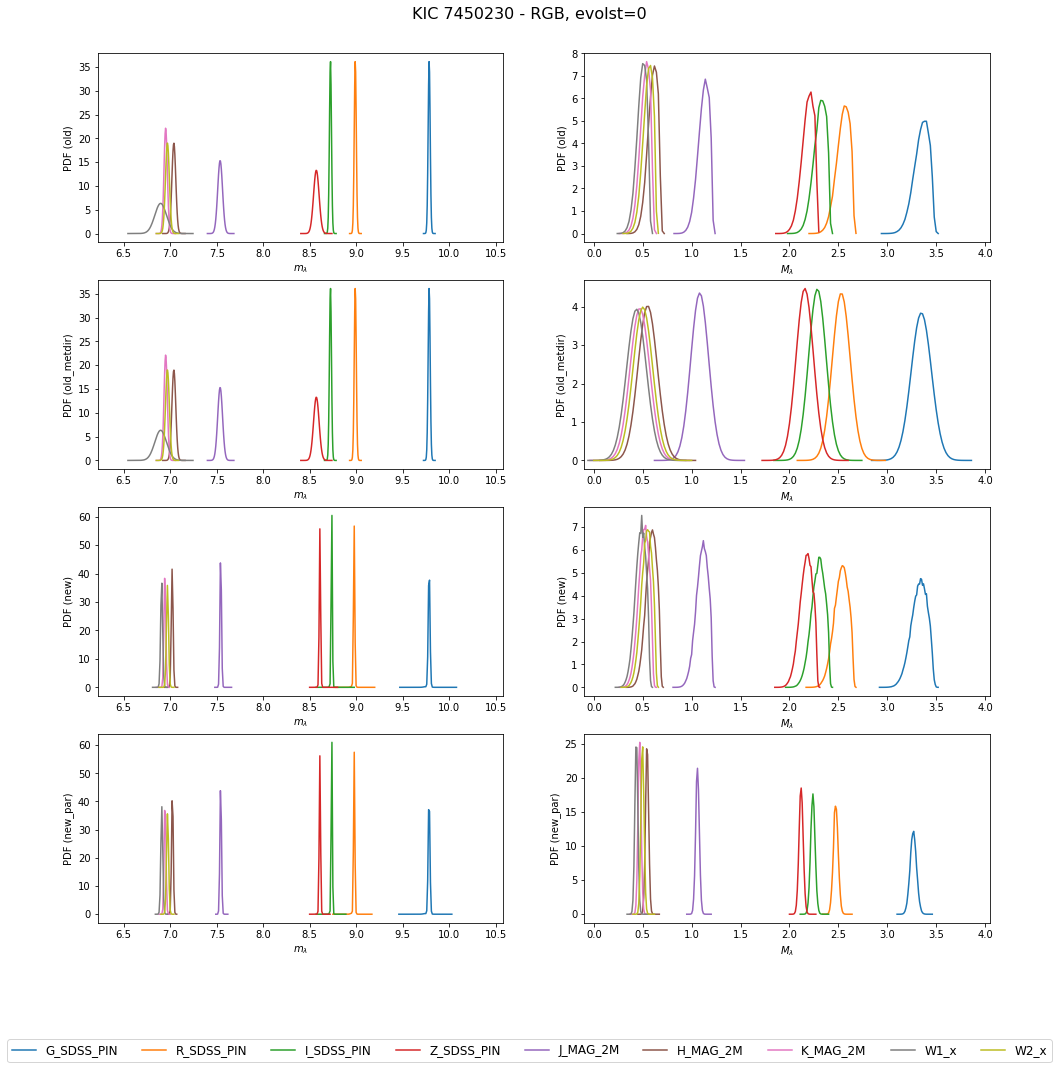

In [36]:
pf.plot_npdfs_mag(7450230, old, 'old', old_metdir, 'old_metdir', new, 'new', new_par, 'new_par',
                 title= "KIC 7450230 - RGB, evolst=0", last_mag_col='W4_x')

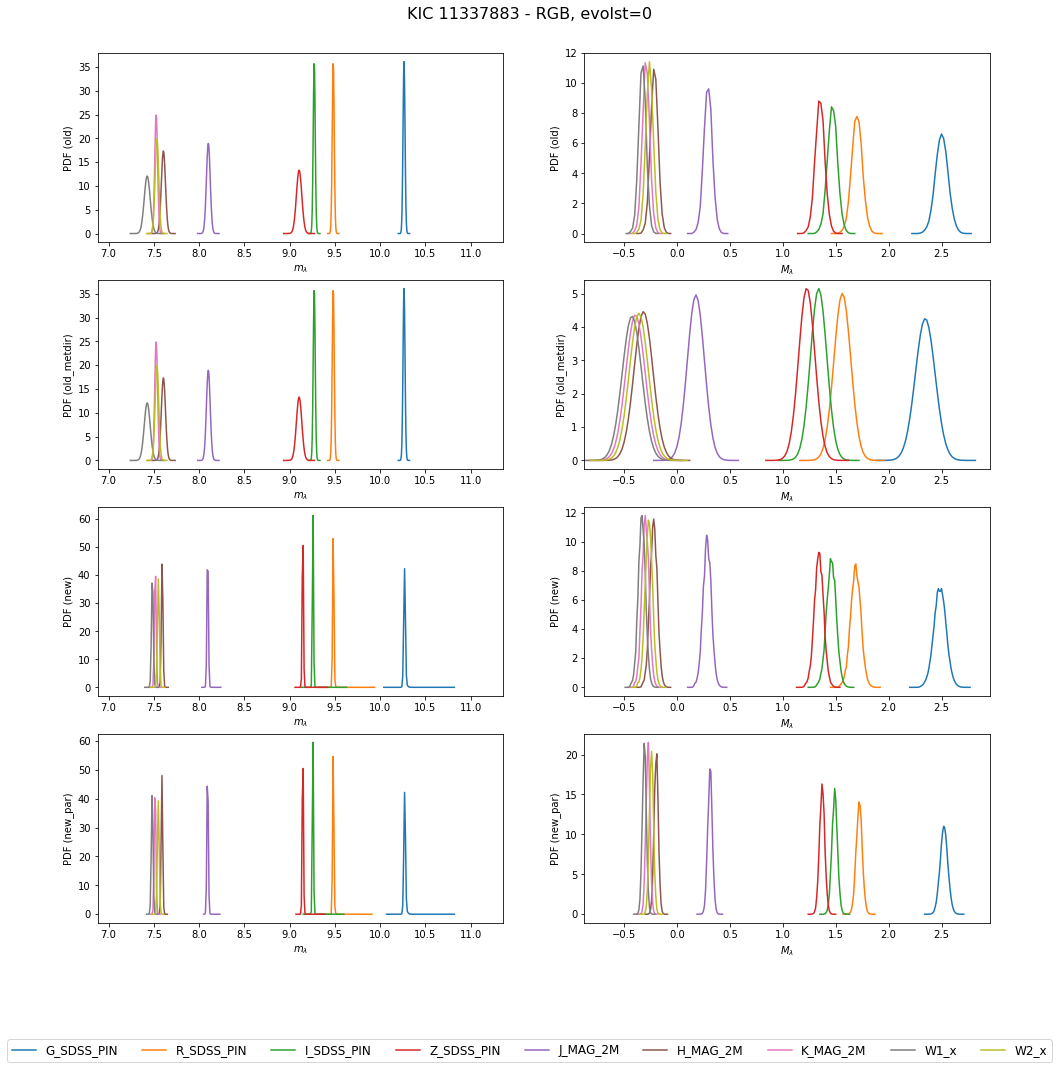

In [37]:
pf.plot_npdfs_mag(11337883, old, 'old', old_metdir, 'old_metdir', new, 'new', new_par, 'new_par',
                 title= "KIC 11337883 - RGB, evolst=0", last_mag_col='W4_x')

### Conclusions

* PDFs of the absolute magnitudes from the 1 step method (__new__) are still a little bit noisy (but I think we do not need to change the PDF bin).
* The PDFs of the apparent magnitudes from the 1 step method (__new__ and __new_par__) are narrower than the 2 step method (__old__). This is due to the way the "new" Bayesian method is done compared with the 2 step method (__old__).

## Differences between methods

The figure below shows relative and absolute differences between 1 step and 2 step methods (blue filled circle), and 1 step and _direct_ methods (orange filled circle) using the same input parameters. The $x$ axis shows the values from 1 step method (__new__), while the relative differences are computed as $(y-x)/x$ and the absolute difference as $(y-x)$, where $y$ is 2 step or _direct_ method (__old__ or __old_md__). Error bars in the differences are simply error propagations from the parameter uncertainties.

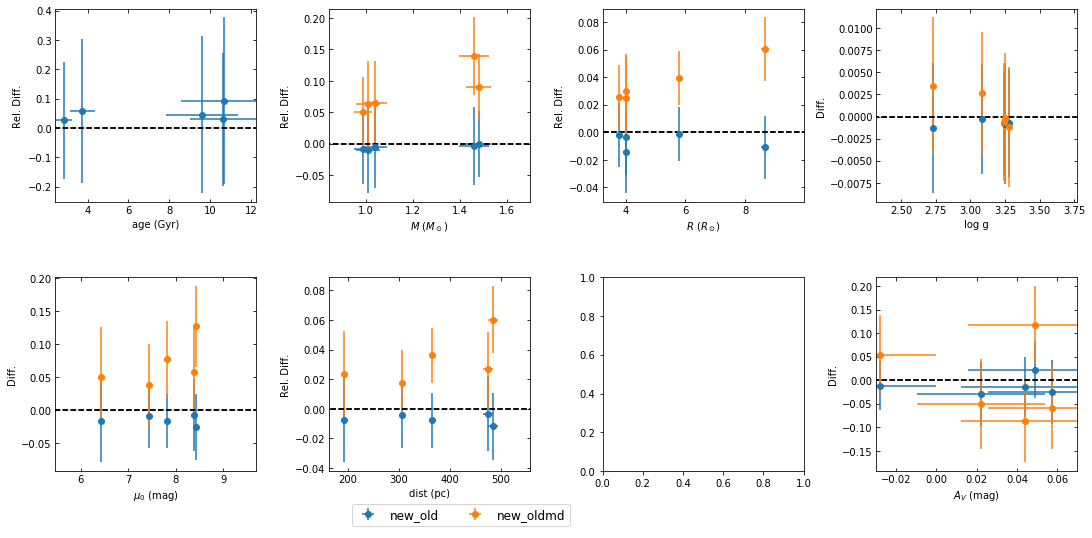

In [38]:
pf.plot_diffs(new, old, 'new_old', old_metdir, 'new_oldmd', diff=False, silent=True)

In [39]:
new.df.loc[:,'diffr_age_mo_new_old':'diffa_Av_mo_new_old_err'].describe()

diffr_age_mo_new_old  diffr_age_mo_new_old_err  diffr_mass_mo_new_old  \
count              5.000000                  5.000000               5.000000   
mean               0.050286                  0.244265              -0.005424   
std                0.026873                  0.033625               0.003994   
min                0.026885                  0.198905              -0.010513   
25%                0.029462                  0.225740              -0.008218   
50%                0.044993                  0.245159              -0.004428   
75%                0.056968                  0.267475              -0.003626   
max                0.093120                  0.284045              -0.000338   

       diffr_mass_mo_new_old_err  diffr_rad_mo_new_old  \
count                   5.000000              5.000000   
mean                    0.060794             -0.006340   
std                     0.006730              0.005766   
min                     0.052092             -0.014003   
25%                     0.056080             -0.010960   
50%                     0.061591             -0.003435   
75%                     0.065886             -0.002165   
max                     0.068321             -0.001139   

       diffr_rad_mo_new_old_err  diffa_logg_mo_new_old  \
count                  5.000000               5.000000   
mean                   0.024702              -0.000760   
std                    0.004189               0.000358   
min                    0.019647              -0.001300   
25%                    0.022994              -0.000800   
50%                    0.023121              -0.000700   
75%                    0.027389              -0.000700   
max                    0.030359              -0.000300   

       diffa_logg_mo_new_old_err  diffa_mu0_mo_new_old  \
count                   5.000000              5.000000   
mean                    0.006477             -0.014960   
std                     0.000606              0.007285   
min                     0.005904             -0.025500   
25%                     0.006117             -0.016600   
50%                     0.006187             -0.016500   
75%                     0.006789             -0.009100   
max                     0.007389             -0.007100   

       diffa_mu0_mo_new_old_err  diffr_dist_mo_new_old  \
count                  5.000000               5.000000   
mean                   0.051253              -0.006864   
std                    0.008026               0.003315   
min                    0.040786              -0.011675   
25%                    0.048374              -0.007601   
50%                    0.049603              -0.007549   
75%                    0.055243              -0.004185   
max                    0.062261              -0.003310   

       diffr_dist_mo_new_old_err  diffa_Av_mo_new_old  diffa_Av_mo_new_old_err  
count                   5.000000             5.000000                 5.000000  
mean                    0.023441            -0.011500                 0.062319  
std                     0.003695             0.020255                 0.006361  
min                     0.018628            -0.029300                 0.052413  
25%                     0.022184            -0.025000                 0.060200  
50%                     0.022551            -0.014000                 0.063742  
75%                     0.025367            -0.011400                 0.066912  
max                     0.028476             0.022200                 0.068327

In [40]:
new.df.loc[:,'diffr_age_mo_new_oldmd':'diffa_Av_mo_new_oldmd'].describe()

diffr_age_mo_new_oldmd  diffr_age_mo_new_oldmd_err  \
count                     0.0                         0.0   
mean                      NaN                         NaN   
std                       NaN                         NaN   
min                       NaN                         NaN   
25%                       NaN                         NaN   
50%                       NaN                         NaN   
75%                       NaN                         NaN   
max                       NaN                         NaN   

       diffr_mass_mo_new_oldmd  diffr_mass_mo_new_oldmd_err  \
count                 5.000000                     5.000000   
mean                  0.081836                     0.069923   
std                   0.035223                     0.009614   
min                   0.050421                     0.058933   
25%                   0.063771                     0.063680   
50%                   0.065268                     0.069789   
75%                   0.090430                     0.073172   
max                   0.139290                     0.084043   

       diffr_rad_mo_new_oldmd  diffr_rad_mo_new_oldmd_err  \
count                5.000000                    5.000000   
mean                 0.036096                    0.027009   
std                  0.014825                    0.005851   
min                  0.024861                    0.020820   
25%                  0.025764                    0.023765   
50%                  0.029741                    0.025342   
75%                  0.039668                    0.029112   
max                  0.060447                    0.036005   

       diffa_logg_mo_new_oldmd  diffa_logg_mo_new_oldmd_err  \
count                 5.000000                     5.000000   
mean                  0.000840                     0.007058   
std                   0.002113                     0.000451   
min                  -0.001200                     0.006645   
25%                  -0.000600                     0.006780   
50%                  -0.000200                     0.006818   
75%                   0.002700                     0.007333   
max                   0.003500                     0.007716   

       diffa_mu0_mo_new_oldmd  diffa_mu0_mo_new_oldmd_err  \
count                5.000000                    5.000000   
mean                 0.070220                    0.064921   
std                  0.034906                    0.006797   
min                  0.038000                    0.058056   
25%                  0.051000                    0.061024   
50%                  0.057600                    0.062753   
75%                  0.077200                    0.067250   
max                  0.127300                    0.075522   

       diffr_dist_mo_new_oldmd  diffr_dist_mo_new_oldmd_err  \
count                 5.000000                     5.000000   
mean                  0.032976                     0.030877   
std                   0.016702                     0.003030   
min                   0.017664                     0.027712   
25%                   0.023791                     0.029454   
50%                   0.026841                     0.029785   
75%                   0.036246                     0.031797   
max                   0.060337                     0.035637   

       diffa_Av_mo_new_oldmd  
count               5.000000  
mean               -0.004700  
std                 0.086384  
min                -0.086900  
25%                -0.058200  
50%                -0.049400  
75%                 0.054200  
max                 0.116800

Median, mean, and standard deviation of the relative and absolute differences between 1 and 2 step methods (__new__ and __old__).

In [41]:
# diffs new_old
pd.concat([new.df.loc[:,'diffr_age_mo_new_old':'diffa_Av_mo_new_old_err'].median(),
           new.df.loc[:,'diffr_age_mo_new_old':'diffa_Av_mo_new_old_err'].mean(),
           new.df.loc[:,'diffr_age_mo_new_old':'diffa_Av_mo_new_old_err'].std()],
          axis=1, sort=False,
          keys=['median', 'mean', 'std'])

median      mean       std
diffr_age_mo_new_old       0.044993  0.050286  0.026873
diffr_age_mo_new_old_err   0.245159  0.244265  0.033625
diffr_mass_mo_new_old     -0.004428 -0.005424  0.003994
diffr_mass_mo_new_old_err  0.061591  0.060794  0.006730
diffr_rad_mo_new_old      -0.003435 -0.006340  0.005766
diffr_rad_mo_new_old_err   0.023121  0.024702  0.004189
diffa_logg_mo_new_old     -0.000700 -0.000760  0.000358
diffa_logg_mo_new_old_err  0.006187  0.006477  0.000606
diffa_mu0_mo_new_old      -0.016500 -0.014960  0.007285
diffa_mu0_mo_new_old_err   0.049603  0.051253  0.008026
diffr_dist_mo_new_old     -0.007549 -0.006864  0.003315
diffr_dist_mo_new_old_err  0.022551  0.023441  0.003695
diffa_Av_mo_new_old       -0.014000 -0.011500  0.020255
diffa_Av_mo_new_old_err    0.063742  0.062319  0.006361

Median, mean, and standard deviation of the relative and absolute differences between 1 step and _direct_ methods (__new__ and __old_md__).

In [42]:
# diffs new_oldmd
pd.concat([new.df.loc[:,'diffr_age_mo_new_oldmd':'diffa_Av_mo_new_oldmd_err'].median(),
           new.df.loc[:,'diffr_age_mo_new_oldmd':'diffa_Av_mo_new_oldmd_err'].mean(),
           new.df.loc[:,'diffr_age_mo_new_oldmd':'diffa_Av_mo_new_oldmd_err'].std()],
          axis=1, sort=False,
          keys=['median', 'mean', 'std'])

/home/thaise/anaconda3/envs/ipyreport/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


median      mean       std
diffr_age_mo_new_oldmd            NaN       NaN       NaN
diffr_age_mo_new_oldmd_err        NaN       NaN       NaN
diffr_mass_mo_new_oldmd      0.065268  0.081836  0.035223
diffr_mass_mo_new_oldmd_err  0.069789  0.069923  0.009614
diffr_rad_mo_new_oldmd       0.029741  0.036096  0.014825
diffr_rad_mo_new_oldmd_err   0.025342  0.027009  0.005851
diffa_logg_mo_new_oldmd     -0.000200  0.000840  0.002113
diffa_logg_mo_new_oldmd_err  0.006818  0.007058  0.000451
diffa_mu0_mo_new_oldmd       0.057600  0.070220  0.034906
diffa_mu0_mo_new_oldmd_err   0.062753  0.064921  0.006797
diffr_dist_mo_new_oldmd      0.026841  0.032976  0.016702
diffr_dist_mo_new_oldmd_err  0.029785  0.030877  0.003030
diffa_Av_mo_new_oldmd       -0.049400 -0.004700  0.086384
diffa_Av_mo_new_oldmd_err    0.086889  0.087463  0.004860

The figure bellow shows the relative and absolute differences between 1 step method with and without parallax in the input parameters (blue filled circle), and 1 step method with parallax and the 2 step method (orange filled circle). The $x$ axis shows the values from 1 step method adding parallax in the input parameter (__new_par__), while the relative differences are computed as $(y-x)/x$ and the absolute difference $(y-x)$, where $y$ is the 1 step method without parallax or the 2 step method (__new__ or __old__). Error bars in the differences are simply error propagations from the parameter uncertainties.

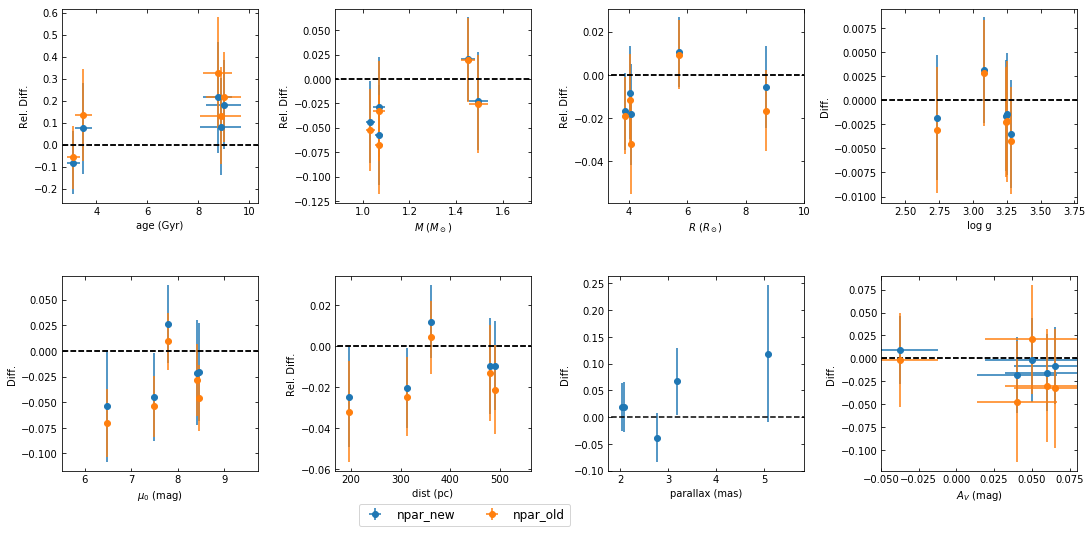

In [43]:
pf.plot_diffs(new_par, new, 'npar_new', old, 'npar_old', diff=False, silent=True)

Median, mean, and standard deviation of the relative and absolute differences between 1 step method with and without parallax as input parameter (__new_par__ and __new__).

In [44]:
# diffs npar_new
pd.concat([new_par.df.loc[:,'diffr_age_mo_npar_new':'diffa_Av_mo_npar_new_err'].median(),
           new_par.df.loc[:,'diffr_age_mo_npar_new':'diffa_Av_mo_npar_new_err'].mean(),
           new_par.df.loc[:,'diffr_age_mo_npar_new':'diffa_Av_mo_npar_new_err'].std()],
          axis=1, sort=False,
          keys=['median', 'mean', 'std'])

median      mean       std
diffr_age_mo_npar_new       0.081598  0.093929  0.116194
diffr_age_mo_npar_new_err   0.207434  0.205088  0.039150
diffr_mass_mo_npar_new     -0.028705 -0.026454  0.029488
diffr_mass_mo_npar_new_err  0.050114  0.047571  0.004535
diffr_rad_mo_npar_new      -0.008220 -0.007673  0.011537
diffr_rad_mo_npar_new_err   0.018844  0.019482  0.002874
diffa_logg_mo_npar_new     -0.001600 -0.001040  0.002460
diffa_logg_mo_npar_new_err  0.005731  0.005925  0.000440
diffa_mu0_mo_npar_new      -0.021300 -0.022840  0.030992
diffa_mu0_mo_npar_new_err   0.047546  0.046875  0.006594
diffr_dist_mo_npar_new     -0.009732 -0.010383  0.014181
diffr_dist_mo_npar_new_err  0.021666  0.021340  0.002816
diffa_par_mo_npar_new       0.019100  0.037060  0.059023
diffa_par_mo_npar_new_err   0.046976  0.065470  0.035555
diffa_Av_mo_npar_new       -0.007800 -0.006720  0.011132
diffa_Av_mo_npar_new_err    0.041971  0.041637  0.003029

Median, mean, and standard deviation of the relative and absolute differences between the 1 step method with parallax and 2 step method (__new_par__ and __old__).

In [45]:
# diffs npar_new
pd.concat([new_par.df.loc[:,'diffr_age_mo_npar_old':'diffa_Av_mo_npar_old_err'].median(),
           new_par.df.loc[:,'diffr_age_mo_npar_old':'diffa_Av_mo_npar_old_err'].mean(),
           new_par.df.loc[:,'diffr_age_mo_npar_old':'diffa_Av_mo_npar_old_err'].std()],
          axis=1, sort=False,
          keys=['median', 'mean', 'std'])

median      mean       std
diffr_age_mo_npar_old       0.135223  0.150414  0.141257
diffr_age_mo_npar_old_err   0.216091  0.209036  0.035783
diffr_mass_mo_npar_old     -0.033006 -0.031645  0.033105
diffr_mass_mo_npar_old_err  0.045351  0.046007  0.003702
diffr_rad_mo_npar_old      -0.016571 -0.013940  0.015086
diffr_rad_mo_npar_old_err   0.018948  0.019000  0.002166
diffa_logg_mo_npar_old     -0.002300 -0.001800  0.002694
diffa_logg_mo_npar_old_err  0.005695  0.005911  0.000440
diffa_mu0_mo_npar_old      -0.046200 -0.037800  0.030461
diffa_mu0_mo_npar_old_err   0.032253  0.031573  0.002799
diffr_dist_mo_npar_old     -0.021043 -0.017182  0.013836
diffr_dist_mo_npar_old_err  0.014545  0.014287  0.001207
diffa_Av_mo_npar_old       -0.029800 -0.018220  0.027223
diffa_Av_mo_npar_old_err    0.061872  0.060635  0.005960

### Conclusions

* The 1 and 2 step methods (__new__ and __old__) have very good agreement within 1 sigma uncertainty using the same input parameters, while the differences between 1 step and _direct_ methods (__new__ and __old_metdir__) are greater than 1 sigma.
* Ages from the 1 step method, taking into account the parallax (__new_par__), are on average 9 per cent smaller than the same method without parallax (__new__). Comparing them with the 2 step method (__old__), ages are around 15 per cent smaller. Almost all stars have differences within 1 sigma uncertainty (comparing __new_par__ and __new__).
* Distances increase on average 1 per cent when adding the parallax (comparing __new_par__ and __new__).



## Computation time

The table and figure below show the computation time in minutes for each star and method, except the _direct_ method (because the code runs less than 1 minute per star). The 2 step method (__old__) presents the shortest time, while the 1 step method without parallax (__new__) presents the longest one. The 1 step method has extra long loops inside the computaion nucleus of the Bayesian calculation than the 2 step method, so the approximation made on the latter greatly reduces the computation times.

In [46]:
comp_time = pd.DataFrame({'KEPLER_INT': [11249981, 11188192, 10752913, 7450230, 11337883],
                          'old' : [1.18, 0.98, 1.21, 0.97, 1.07],
                          'new' :[59.80, 99.63, 85.75, 112.66, 54.61],
                         'new_par' :[6.07, 15.53, 10.99, 13.88, 4.73]})
comp_time = comp_time[['KEPLER_INT', 'new_par', 'new', 'old']]
comp_time

KEPLER_INT  new_par     new   old
0    11249981     6.07   59.80  1.18
1    11188192    15.53   99.63  0.98
2    10752913    10.99   85.75  1.21
3     7450230    13.88  112.66  0.97
4    11337883     4.73   54.61  1.07

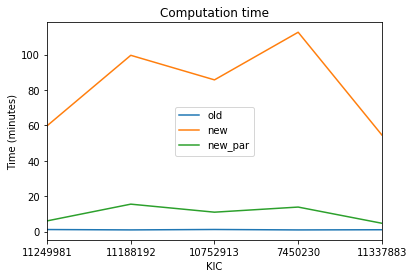

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

colors = ('C0', 'C1', 'C2')

comp_time.reset_index().plot('index', 'old', ax=ax, color=colors[0], label='old')
comp_time.reset_index().plot('index', 'new', ax=ax, color=colors[1], label='new')
comp_time.reset_index().plot('index', 'new_par', ax=ax, color=colors[2], label='new_par')
plt.xticks(comp_time.index, comp_time.KEPLER_INT)
    
ax.set_ylabel('Time (minutes)')
ax.set_xlabel('KIC')
ax.set_title('Computation time')

plt.show()

In [48]:
pd.set_option("display.max_seq_items", None)
inp_param = new.df[[u'KEPLER_INT', u'APOKASC2_DELTA_NU', u'APOKASC2_DELTA_NU_ERR',
       u'APOKASC2_NU_MAX', u'APOKASC2_NU_MAX_ERR', u'DELTA_PI',
       u'DELTA_PI_ERR', u'EVOLST', u'FE_H_ADOP_COR', u'FE_H_ADOP_COR_ERR',
       u'TEFF_COR', u'TEFF_COR_ERR', u'LOGG_COR', u'LOGG_COR_ERR', u'GAIA_L',
       u'GAIA_B', u'KEP_MAG', u'KEP_MAG_ERR', u'G_SDSS_PIN', u'G_SDSS_PIN_ERR',
       u'R_SDSS_PIN', u'R_SDSS_PIN_ERR', u'I_SDSS_PIN', u'I_SDSS_PIN_ERR',
       u'Z_SDSS_PIN', u'Z_SDSS_PIN_ERR', u'DDO51_M', u'DDO51_MAG_ERR',
       u'J_MAG_2M', u'J_MAG_ERR', u'H_MAG_2M', u'H_MAG_ERR', u'K_MAG_2M',
       u'K_MAG_ERR', u'W1_x', u'W1_ERR', u'W2_x', u'W2_ERR', u'W3_x',
       u'W3_ERR', u'W4_x', u'W4_ERR', u'AV_INP', u'EAV_INP', u'LUM',
       u'LUM_ERR', u'GAIA_PARALLAX_DR2', u'GAIA_PARALLAX_DR2_ERR', u'2MASS_ID']]
inp_param

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID  
0               0.022469  2M19381790+4857453  
1               0.021132  2M19222335+4853586  
2               0.022064  2M19552557+4805354  
3               0.024049  2M19333399+4302096  
4               0.024667  2M18583500+4906208

In [49]:
comp_time_inp = pd.merge(inp_param, comp_time, how='inner',
                         left_on=inp_param.columns[0], right_on=comp_time.columns[0], sort=False)
comp_time_inp

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    11249981              6.268                0.02507         67.74400   
1    11188192             16.892                0.13514        218.39700   
2    10752913             17.953                0.12567        231.10201   
3     7450230             16.824                0.20189        214.90900   
4    11337883             11.618                0.04647        148.64600   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.74518       NaN           NaN       0        0.31511   
1              2.18397       NaN           NaN       0       -0.03084   
2              2.07992       NaN           NaN       0       -0.16888   
3              1.93418      89.2          1.82       0       -0.05042   
4              1.33781      76.3          0.87       0        0.03858   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.02406  4645.69336      67.58839   2.78322       0.04780   
1            0.03134  4787.44385      74.33677   3.17519       0.05504   
2            0.03420  4811.56494      75.73858   3.19890       0.05799   
3            0.03172  4790.52734      74.51808   3.17447       0.05545   
4            0.03218  4900.19092      79.41094   3.05508       0.05449   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  81.64426  13.02029    9.764          NaN      10.651            0.01   
1  80.43792  15.35727   11.053          NaN      11.772            0.01   
2  82.22542  10.10983   10.174          NaN      10.836            0.01   
3  75.85426  11.08614    9.079          NaN       9.786            0.01   
4  79.11996  19.05793    9.609          NaN      10.264            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0       9.654            0.01       9.342            0.01       9.172   
1      10.974            0.01      10.694            0.01      10.555   
2      10.075            0.01       9.836            0.01       9.682   
3       8.991            0.01       8.724            0.01       8.572   
4       9.482            0.01       9.272            0.01       9.105   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN     8.003      0.018     7.492   
1            0.03      NaN            NaN     9.517      0.021     9.000   
2            0.03      NaN            NaN     8.669      0.029     8.136   
3            0.03      NaN            NaN     7.537      0.026     7.039   
4            0.03      NaN            NaN     8.102      0.021     7.606   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR   W1_x  W1_ERR   W2_x  W2_ERR   W3_x  \
0      0.016     7.363      0.016  7.208   0.037  7.399   0.020  7.301   
1      0.028     8.913      0.024  8.842   0.023  8.919   0.020  8.834   
2      0.034     8.081      0.025  7.991   0.025  8.082   0.020  8.013   
3      0.021     6.951      0.018  6.897   0.063  6.970   0.021  6.917   
4      0.023     7.526      0.016  7.427   0.033  7.534   0.020  7.454   

   W3_ERR   W4_x  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.016  7.316   0.088     NaN      NaN  NaN      NaN           2.036985   
1   0.022  8.736   0.285     NaN      NaN  NaN      NaN           2.080638   
2   0.019  7.799   0.108     NaN      NaN  NaN      NaN           3.184508   
3   0.015  6.917   0.063     NaN      NaN  NaN      NaN           5.074752   
4   0.017  7.373   0.086     NaN      NaN  NaN      NaN           2.774106   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID  new_par     new   old  
0               0.022469  2M19381790+4857453     6.07   59.80  1.18  
1               0.021132  2M19222335+4853586    15.53   99.63  0.98  
2               0.022064  2M19552557+4805354    10.99   85.75  1.21  
3               0.024049  2M19333399+4302096    13.88  112.66  0.97  
4               0.024667  2M18583500+4906208     4.

In order to understand if there are some particular parameters that make the computation time to increase, I inspected the computation time versus each input parameter and its uncertainties as shown in the figures below.

In [50]:
import seaborn as sns

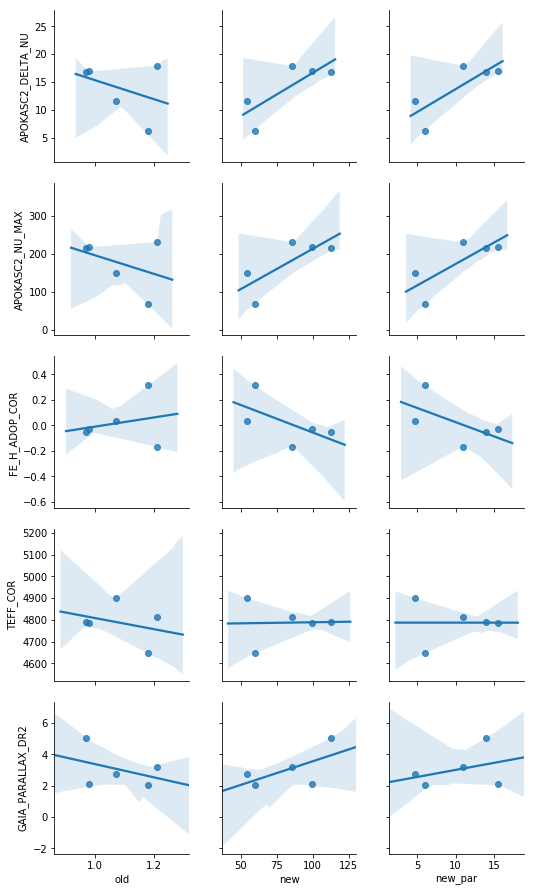

In [51]:
sns.pairplot(comp_time_inp,kind="reg",
             x_vars=["old", "new", "new_par"],
             y_vars=["APOKASC2_DELTA_NU", "APOKASC2_NU_MAX", "FE_H_ADOP_COR", "TEFF_COR", "GAIA_PARALLAX_DR2"])
plt.show()

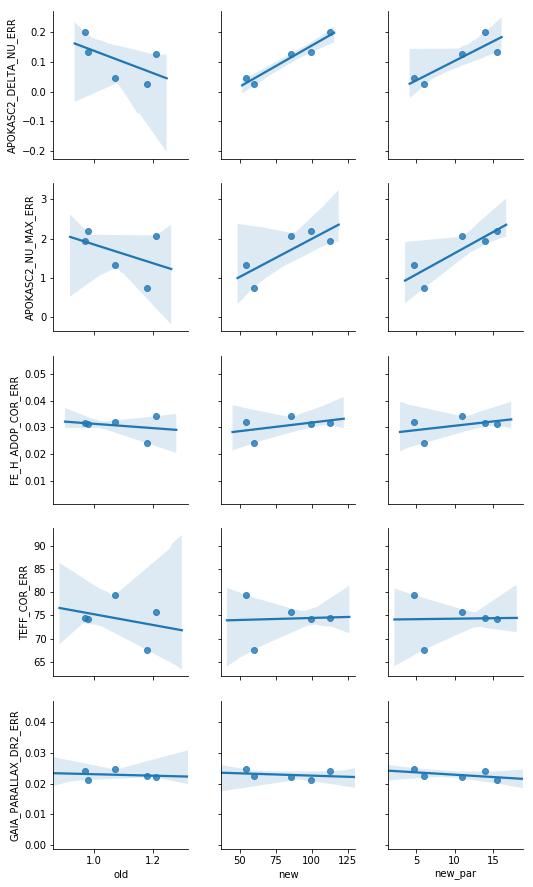

In [52]:
sns.pairplot(comp_time_inp,kind="reg",
             x_vars=["old", "new", "new_par"],
             y_vars=["APOKASC2_DELTA_NU_ERR", "APOKASC2_NU_MAX_ERR", "FE_H_ADOP_COR_ERR", "TEFF_COR_ERR", "GAIA_PARALLAX_DR2_ERR"])
plt.show()

### Conclusions

* It is expected to have longer computation time for the 1 step method without parallax, because of the extra loops introduced inside the code of Bayesian nucleus.
* For the 1 step, it _seems_ that the computation time increases as uncertainties on seismic parameters increase.

## General conclusions

* Both code are working very well with dynamic arrays.
* The PDF bins are well-defined for the 5 stars studied here.
* The 1 step method results central tendencies and PDF shapes for age, mass, radius, and $\log{g}$ similar to the 2 step method when using the same input parameters ($T_{\rm eff}$, $[M/H]$, $\Delta\nu$, and $\nu_{\rm max}$). The 2 step method provides narrower $\mu_0$ and distance PDFs than the 1 step method. In the other hand, $A_V$ PDFs from 1 step method are narrower. The 1 and 2 step metod have a very good agreement within 1 sigma uncertainty. 
* The mean distance uncertainty from 1 step method is compatible with the radius uncertainty and it is also similar with the one from the _direct_ method, while in the 2 step method the mean distance uncertainty is around half the radius one.
* Shape and mode values of the PDFs from the 1 step method with parallax  are different when compared with 1 step without parallax and 2 step methods. 
* The PDFs become narrower when including parallax by a factor of about 0.5 in age, mass, and radius, and by a factor greater than 0.3 in distance.
* The mean relative uncertainties on age, mass, radius, and distance decrease from 16.1, 4.2, 1.7, and 1.2 per cent to 8.1, 2.1, 0.8, and 0.7 per cent when adding parallax, respectively, comparing the 1 step and 2 step methods.
* Ages from the 1 step method, taking into account the parallax, are on average 9 per cent smaller than the same method without parallax. Comparing them with the 2 step method, ages are around 15 per cent smaller. 
* Distances increase on average 1 per cent when adding the parallax.
* For the 1 step, it _seems_ that the computation time increases as uncertainties on seismic parameters increase.


### Next steps

* This sample is too small to have a good statistic, so I will redo this analysis using the results of 30 nearby stars.

To convert this notebook to pdf:
jupyter nbconvert --to pdf 'Analyzing_nearby_stars.ipynb' --template classicm  --config='myconfig.py'